In [1]:
import pandas as pd
import json
original = pd.read_json("./yelp_dataset/yelp_academic_dataset_business.json", lines=True)
sample = pd.read_csv("./resources/business_sample.csv")
df = pd.read_csv("./resources/business_clean.csv")
top20a = pd.read_csv("./resources/top20attributes.csv", header=None)
top20c = pd.read_csv("./resources/top20Cats.csv", header=None)
original = original[original['business_id'].isin(sample['business_id'])]

In [2]:
state_map = {}
i = 0
for index, row in df.iterrows():
    if not row.state in state_map:
        state_map[row.state] = i
        i += 1

In [3]:
df['state'] = df['state'].map(state_map, na_action='ignore')
clean = df.drop(['attributes', 'categories', 'state'], axis=1)

In [4]:
def parseAttributes(d, attribute):
    if type(d) is not dict:
        return -1
    elif attribute in d:
        if d[attribute] == 'True' or d[attribute] == "u'free'" or d[attribute] == 'free':
            return 1
        if d[attribute] == 'False' or d[attribute] == "u'no'" or d[attribute] == 'no' or d[attribute] == 'None':
            return 0
    else:
        for key in d:
            if attribute in key:
                if key[attribute] == 'True' or key[attribute] == "u'free'" or key[attribute] == 'free':
                    return 1
                if key[attribute] == 'False' or key[attribute] == "u'no'" or key[attribute] == 'no'or key[attribute] == 'None':
                    return 0
    return -1

In [5]:
def parseCategories(d, category):
    if category in d:
        return 1
    else:
        return 0

In [6]:
top20list = top20c[0].tolist()[:20]
for i in range(20):
    top20list[i] = top20list[i].split(':')[0]
top20list

for category in top20list:
    original[category] = original['categories'].apply(lambda x: parseCategories(x, category))
for category in top20list:
    clean[category] = original[category].values

In [7]:
top20list = top20a[0].tolist()
top20list.remove('RestaurantsAttire')
top20list.remove('NoiseLevel')
top20list.remove('BikeParking')
top20list.remove('Ambience')
top20list.remove('RestaurantsGoodForGroups')
top20list.remove('HasTV')
top20list.remove('RestaurantsPriceRange2')
top20list.remove('GoodForMeal')
top20list.remove('Alcohol')
top20list.remove('BusinessParking')

for attribute in top20list:
    original[attribute] = original['attributes'].apply(lambda x: parseAttributes(x, attribute))
for attribute in top20list:
    clean[attribute] = original[attribute].values

In [8]:
clean

,stars,review_count,is_open,total_hours,Food,American (Traditional),Sandwiches,Nightlife,Bars,Fast Food,...,RestaurantsTakeOut,RestaurantsDelivery,BusinessAcceptsCreditCards,OutdoorSeating,RestaurantsReservations,GoodForKids,WiFi,Caters,RestaurantsTableService,HappyHour
0,2.0,116,0,105.0,1,1,0,0,0,1,...,1,1,-1,-1,-1,-1,-1,-1,-1,-1
1,4.0,276,1,57.0,1,0,1,0,0,1,...,1,1,1,1,0,1,0,1,-1,-1
2,4.5,18,0,0.0,0,0,1,0,0,0,...,1,1,1,0,0,1,-1,-1,-1,-1
3,1.5,28,1,72.5,1,1,0,0,0,0,...,1,0,1,1,1,1,1,1,1,-1
4,4.0,29,1,45.0,1,0,0,0,0,1,...,1,1,1,1,0,1,-1,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.5,32,1,68.0,1,0,1,0,0,1,...,1,1,1,0,0,1,-1,1,-1,-1
196,3.5,19,1,75.5,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
197,4.5,29,1,22.5,1,0,0,0,0,0,...,1,-1,1,-1,-1,-1,-1,1,-1,-1
198,3.5,44,1,78.5,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

SSE = []
for i in range(3, 6):
    model = KMeans(n_clusters=i, random_state=42)
    model = model.fit(clean)
    score = model.score(clean)
    SSE.append(model.inertia_)
    

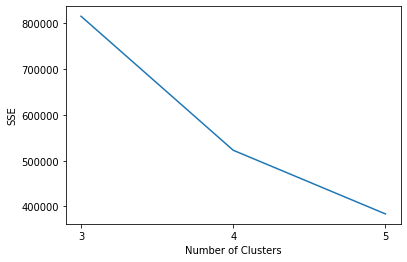

In [10]:
plt.figure()
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.plot(
    range(3, 6),
    SSE,
)
plt.xticks([3,4,5])
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
stand_scaled = StandardScaler().fit_transform(clean)
stand_scaled = pd.DataFrame(stand_scaled, columns=clean.columns)

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

SSE = []
for i in range(3, 6):
    model = KMeans(n_clusters=i, random_state=42)
    model = model.fit(stand_scaled)
    score = model.score(stand_scaled)
    SSE.append(model.inertia_)    

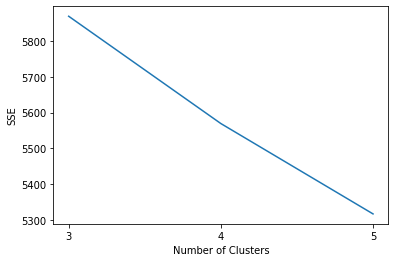

In [13]:
plt.figure()
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.plot(
    range(3, 6),
    SSE,
)
plt.xticks([3,4,5])
plt.show()

In [14]:
model.labels_

array([2, 4, 0, 4, 4, 2, 2, 0, 0, 0, 0, 1, 1, 2, 3, 2, 1, 0, 0, 3, 2, 0,
       0, 0, 4, 0, 0, 2, 0, 4, 0, 1, 0, 0, 2, 0, 2, 1, 1, 4, 4, 3, 0, 0,
       0, 1, 4, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 4, 4, 4, 2, 0, 0, 2, 2, 0,
       1, 4, 0, 1, 1, 4, 4, 0, 2, 0, 2, 4, 0, 1, 1, 2, 4, 1, 2, 0, 0, 0,
       3, 1, 0, 2, 4, 1, 3, 0, 0, 1, 1, 0, 4, 0, 0, 0, 4, 4, 2, 0, 0, 0,
       0, 1, 2, 4, 0, 1, 0, 0, 4, 0, 2, 0, 4, 4, 0, 0, 1, 0, 0, 0, 3, 4,
       2, 0, 4, 4, 2, 1, 0, 0, 0, 0, 3, 0, 4, 4, 3, 0, 4, 4, 3, 1, 1, 2,
       2, 4, 3, 0, 1, 3, 0, 0, 3, 2, 4, 0, 0, 0, 0, 4, 0, 0, 2, 4, 1, 2,
       0, 1, 4, 2, 4, 2, 0, 4, 0, 3, 0, 0, 1, 0, 0, 0, 3, 4, 1, 4, 0, 2,
       2, 2])

In [15]:
temp = clean
temp['class'] = model.labels_

In [16]:
temp

,stars,review_count,is_open,total_hours,Food,American (Traditional),Sandwiches,Nightlife,Bars,Fast Food,...,RestaurantsDelivery,BusinessAcceptsCreditCards,OutdoorSeating,RestaurantsReservations,GoodForKids,WiFi,Caters,RestaurantsTableService,HappyHour,class
0,2.0,116,0,105.0,1,1,0,0,0,1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,2
1,4.0,276,1,57.0,1,0,1,0,0,1,...,1,1,1,0,1,0,1,-1,-1,4
2,4.5,18,0,0.0,0,0,1,0,0,0,...,1,1,0,0,1,-1,-1,-1,-1,0
3,1.5,28,1,72.5,1,1,0,0,0,0,...,0,1,1,1,1,1,1,1,-1,4
4,4.0,29,1,45.0,1,0,0,0,0,1,...,1,1,1,0,1,-1,0,0,-1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.5,32,1,68.0,1,0,1,0,0,1,...,1,1,0,0,1,-1,1,-1,-1,4
196,3.5,19,1,75.5,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,0
197,4.5,29,1,22.5,1,0,0,0,0,0,...,-1,1,-1,-1,-1,-1,1,-1,-1,2
198,3.5,44,1,78.5,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,2


In [17]:
temp.to_csv("./resources/temp.csv", index=False)

<b>Principal Component Analysis</b>

In [42]:
from sklearn import decomposition
from sklearn.decomposition import PCA
import seaborn as sb
import numpy as np

k = 3
model = KMeans(n_clusters=k, random_state=42)
model = model.fit(stand_scaled)
score = model.score(stand_scaled)

stand_scaled['class'] = model.labels_

pca = decomposition.PCA(35)

label = KMeans(n_clusters=k).fit_predict(stand_scaled)
data_pca = pca.fit_transform(stand_scaled)

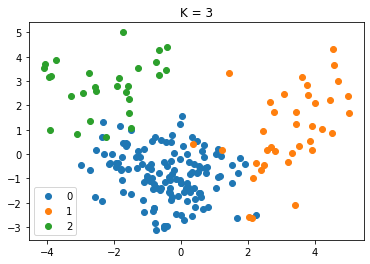

In [43]:
u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(data_pca[label == i , 0] , data_pca[label == i , 1] , label = i)
plt.legend()
plt.title('K = ' + str(k))
plt.show()

In [44]:
one = sample.drop(['Unnamed: 0'], axis=1)
two = stand_scaled.drop(['class'], axis=1)
three = pd.DataFrame(model.labels_, columns=['class'])

In [45]:
one.to_csv('./216480444-216482440-218407734-T2Org.csv', index=False)
two.to_csv('./216480444-216482440-218407734-T2Mod.csv', index=False)
three.to_csv('./216480444-216482440-218407734-T2Class.csv', index=False)

Analysis

In [46]:
clean['class'] = model.labels_

In [50]:
clean[clean['class'] == 0].describe()

,stars,review_count,is_open,total_hours,Food,American (Traditional),Sandwiches,Nightlife,Bars,Fast Food,...,RestaurantsDelivery,BusinessAcceptsCreditCards,OutdoorSeating,RestaurantsReservations,GoodForKids,WiFi,Caters,RestaurantsTableService,HappyHour,class
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,...,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.0
mean,3.414530,62.675214,0.735043,55.865385,0.222222,0.196581,0.068376,0.239316,0.247863,0.008547,...,0.555556,0.846154,0.341880,0.358974,0.683761,-0.136752,0.170940,-0.213675,-0.333333,0.0
std,0.802181,104.460752,0.443209,31.907253,0.417528,0.399122,0.253476,0.428501,0.433629,0.092450,...,0.516027,0.484508,0.527884,0.579261,0.624908,0.829478,0.833466,0.917540,0.880830,0.0
min,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0
25%,3.000000,16.000000,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0
50%,3.500000,26.000000,1.000000,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000,0.0
75%,4.000000,63.000000,1.000000,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
max,5.000000,770.000000,1.000000,128.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [51]:
clean[clean['class'] == 1].describe()

,stars,review_count,is_open,total_hours,Food,American (Traditional),Sandwiches,Nightlife,Bars,Fast Food,...,RestaurantsDelivery,BusinessAcceptsCreditCards,OutdoorSeating,RestaurantsReservations,GoodForKids,WiFi,Caters,RestaurantsTableService,HappyHour,class
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.0
mean,3.557692,227.173077,0.711538,63.298077,0.807692,0.192308,0.480769,0.019231,0.019231,0.423077,...,0.769231,0.865385,0.307692,0.038462,0.750000,-0.346154,0.269231,-0.634615,-0.846154,1.0
std,0.820413,1044.719565,0.457467,28.866539,0.397959,0.397959,0.504505,0.138675,0.138675,0.498867,...,0.425436,0.486236,0.642863,0.441101,0.653047,0.813721,0.888166,0.627127,0.364321,0.0
min,1.500000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0
25%,3.000000,12.000000,0.000000,51.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0
50%,3.750000,38.500000,1.000000,64.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.0
75%,4.000000,69.250000,1.000000,76.500000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,-1.000000,1.0
max,5.000000,7568.000000,1.000000,146.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.0


In [52]:
clean[clean['class'] == 2].describe()

,stars,review_count,is_open,total_hours,Food,American (Traditional),Sandwiches,Nightlife,Bars,Fast Food,...,RestaurantsDelivery,BusinessAcceptsCreditCards,OutdoorSeating,RestaurantsReservations,GoodForKids,WiFi,Caters,RestaurantsTableService,HappyHour,class
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0
mean,3.564516,97.032258,0.612903,53.967742,0.290323,0.096774,0.032258,0.096774,0.225806,0.064516,...,-0.354839,-0.419355,-0.580645,-0.709677,-0.838710,-0.709677,-0.838710,-0.935484,-0.935484,2.0
std,0.793116,157.796596,0.495138,31.499189,0.461414,0.300537,0.179605,0.300537,0.425024,0.249731,...,0.877435,0.922829,0.764818,0.588419,0.454369,0.692510,0.522607,0.359211,0.359211,0.0
min,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.0
25%,3.000000,18.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.0
50%,3.500000,29.000000,1.000000,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.0
75%,4.250000,79.500000,1.000000,77.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.500000,1.000000,-0.500000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.0
max,4.500000,630.000000,1.000000,105.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0


In [ ]:
for index, row in